# Análise Exploratória de Dados com o Dataset do TMDB 5000

## Importação de Bibliotecas

In [1]:
# Importa o numpy com o apelido np
import numpy as np

# Importa o pandas com o apelido pd
import pandas as pd

# Importa o pyplot com o apelido plt
import matplotlib.pyplot as plt

# Importa o seaborn com o apelido sns
import seaborn as sns

## Leitura do Conjunto de Dados

In [2]:
# Importa o arquivo ratings.csv
notas = pd.read_csv('ratings.csv')

In [3]:
# Exibe as cinco primeiras linhas do dataframe
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
# Remove a coluna especificada
notas.drop('timestamp', axis='columns', inplace=True)

## Verificação do Tamanho do Conjunto de Dados

In [6]:
# Exibe as dimensões do dataframe
notas.shape

(100836, 3)

In [9]:
# Desempacota a tupla
num_linhas, num_colunas = notas.shape

In [10]:
print(f'Há {num_linhas} linhas distribuídas ao longo de {num_colunas} colunas.')

Há 100836 linhas distribuídas ao longo de 3 colunas.


## Renomeando as Colunas

In [11]:
# Renomeia as colunas do dataframe
notas.columns = ['usuarioId', 'filmeId', 'nota']

# Exibe as cinco primeiras linhas
notas.head()

,usuarioId,filmeId,nota
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


## Análise das Notas

### Distribuição de Frequência das Notas

In [12]:
# Seleciona a coluna nota, retornando uma Série
notas['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [13]:
# Exibe o tipo do objeto (série do pandas)
type(notas['nota'])

pandas.core.series.Series

In [14]:
# Obtém os valores únicos da coluna nota em um array
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [15]:
# Ordena os valores únicos da variável `nota`
np.sort(notas['nota'].unique())

array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [17]:
# Retorna uma contagem dos valores únicos da coluna nota (distribuição de frequência)
notas['nota'].value_counts()

nota
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

In [18]:
# Retorna a distribuição de frequências relativas das notas
notas['nota'].value_counts(normalize=True)

nota
4.0    0.265957
3.0    0.198808
5.0    0.131015
3.5    0.130271
4.5    0.084801
2.0    0.074884
2.5    0.055040
1.0    0.027877
1.5    0.017762
0.5    0.013586
Name: proportion, dtype: float64

**Observação:** Note que este método ordenou as notas em ordem decrescente de frequência. Com isso, podemos identificar que $4.0$ foi a nota mais frequente deste conjunto de dados, ao passo que $0.5$ foi a nota menos frequente.

### Estatísticas Descritivas

#### Média

In [19]:
# Obtém a média dos valores da coluna selecionada
# Se todos os filmes tivessem recebido a mesma nota, esta seria a nota recebida
notas['nota'].mean()

3.501556983616962

#### Moda

In [77]:
# Exibe a moda das notas
notas['nota'].mode()[0]

4.0

#### Mediana

In [20]:
# Exibe a mediana das notas
notas['nota'].median()

3.5

Para este cojunto de dados, observamos a seguinte desigualdade:

$$moda > media > mediana$$

### Histograma de Frequência das Notas

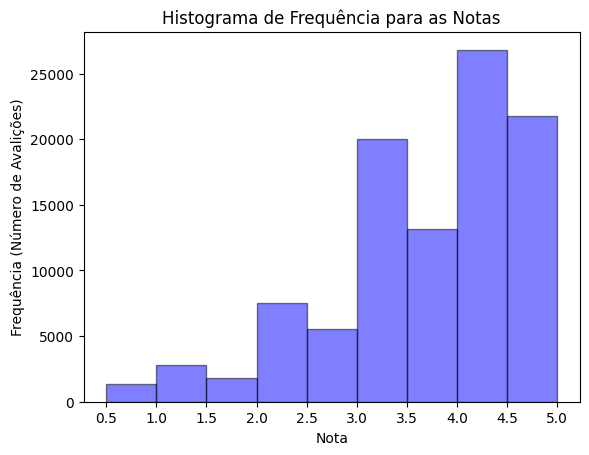

In [21]:
# Nota mínima
menor_nota = notas['nota'].min()

# Nota máxima
maior_nota = notas['nota'].max()

# Obtém a quantidade de valores únicos
num_notas_unicas = notas['nota'].unique().size

# Obtém os limites das categorias (fronteiras das classes)
limites_categorias = np.histogram_bin_edges(
    notas['nota'], 
    bins=np.linspace(menor_nota, maior_nota, num=num_notas_unicas, endpoint=True)
)

# Cria um histograma de frequências para as notas
plt.hist(x=notas['nota'], bins=limites_categorias, alpha=0.5, color='b', edgecolor='k')

# Rótulo do eixo horizontal
plt.xlabel('Nota')

# Rótulo do eixo vertical
plt.ylabel('Frequência (Número de Avalições)')

# Título do gráfico
plt.title('Histograma de Frequência para as Notas')

# Define os marcadores do eixo horizontal
plt.xticks(limites_categorias)

# Exibe o histograma
plt.show()

In [76]:
# Exibe uma descrição estatística dos valores da coluna notas
notas['nota'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

Com o histograma e a descrição acima, podemos chegar as seguinte conclusões:

1. Há 100.836 avaliações neste conjunto de dados;
2. A nota média dos filmes é 3.5;
3. A menor nota dada por um crítico foi de 0.5;
4. A maior nota dada por um crítico foi de 5.0;
5. A amplitude das notas é $5.0 - 0.5 = 4.5$;
6. 25% das notas são inferiores a 3.0 e 75% são superiores a este valor;
7. 50% das notas são inferiores a 3.5 e 50% são superiores a este valor;
8. 75% das notas são inferiores a 4.0 e 25% são superiores a este valor;
9. O desvio padrão das notas é de 1.04.

<Axes: title={'center': 'Boxplot das Notas dos Filmes'}, xlabel='Nota'>

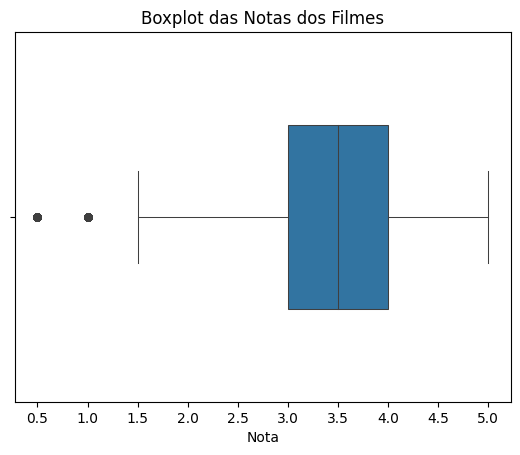

In [26]:
# Exibe um boxplot da variável `nota`
ax = sns.boxplot(
    data=notas,
    x='nota',
    width=.5,
    flierprops={'marker': 'o'},
    linewidth=.75
)

# Define um título para o boxplot
ax.set_title('Boxplot das Notas dos Filmes')

# Define um título para o eixo x
ax.set_xlabel('Nota')

# Define os marcadores do eixo x
plt.xticks(np.linspace(menor_nota, maior_nota, num=num_notas_unicas, endpoint=True))

# Exibe o boxplot
ax

## Análise Exploratória de Dados (EDA)

In [27]:
# Lê o arquivo com os nomes dos filmes
filmes = pd.read_csv('movies.csv')

# Exibe as cinco primeiras linhas do dataframe
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [28]:
# Renomeia as colunas do dataframe
filmes.columns = ['filmeId', 'titulo', 'generos']

In [30]:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [31]:
# Localiza todas as linhas do dataframe `notas` em que o ID do filme é 1, isto é, o filme é Toy Story
notas.query('filmeId == 1')

,usuarioId,filmeId,nota
0,1,1,4.0
516,5,1,4.0
874,7,1,4.5
1434,15,1,2.5
1667,17,1,4.5
...,...,...,...
97364,606,1,2.5
98479,607,1,4.0
98666,608,1,2.5
99497,609,1,3.0


In [32]:
# Seleciona a coluna notas do dataframe filtrado
notas.query('filmeId == 1')['nota']

0        4.0
516      4.0
874      4.5
1434     2.5
1667     4.5
        ... 
97364    2.5
98479    4.0
98666    2.5
99497    3.0
99534    5.0
Name: nota, Length: 215, dtype: float64

In [33]:
# Obtém a média das notas do filme cujo id é 1
notas.query('filmeId == 1')['nota'].mean()

3.9209302325581397

Observamos que a média das notas do filme cujo ID é 1 é 3.92, que é superior a média de notas geral.

In [34]:
notas.groupby('filmeId')['nota'].mean()

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

In [35]:
medias_por_filme = notas.groupby('filmeId')['nota'].mean()
medias_por_filme

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

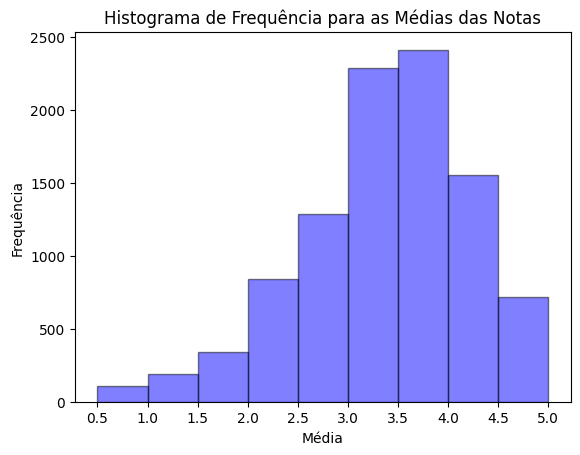

In [37]:
# Obtém os limites das categorias
limites_categorias = np.histogram_bin_edges(
    medias_por_filme, 
    bins=np.linspace(menor_nota, maior_nota, num=num_notas_unicas, endpoint=True)
)

# Cria um histograma de frequências para as notas
plt.hist(x=medias_por_filme, bins=limites_categorias, alpha=0.5, color='b', edgecolor='k')

# Rótulo do eixo horizontal
plt.xlabel('Média')

# Rótulo do eixo vertical
plt.ylabel('Frequência')

# Título do gráfico
plt.title('Histograma de Frequência para as Médias das Notas')

# Define os marcadores do eixo horizontal
plt.xticks(limites_categorias)

# Exibe o histograma
plt.show()

<Axes: xlabel='nota'>

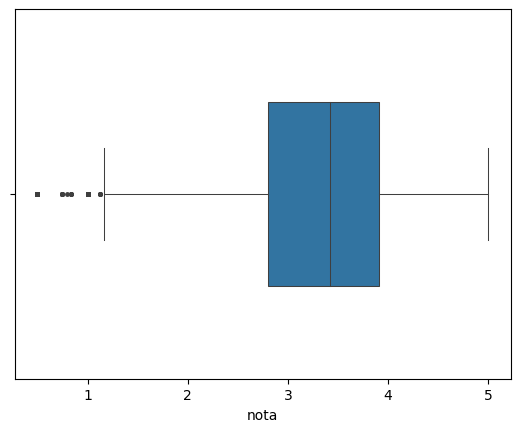

In [38]:
# Exibe um box plot com a distribuição das notas médias
sns.boxplot(
    x=medias_por_filme,
    width=.5,
    flierprops={'marker': '.'},
    linewidth=.75
)

## Analisando alguma Variáveis

In [40]:
# Base de dados do tmdb 5000
tmdb = pd.read_csv('tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [41]:
# Valores únicos de idiomas
tmdb['original_language'].unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

- **Tipo de Dado:** qualitativo
- **Nível de Mensuração:** nominal

In [43]:
tmdb['budget']

0       237000000
1       300000000
2       245000000
3       250000000
4       260000000
          ...    
4798       220000
4799         9000
4800            0
4801            0
4802            0
Name: budget, Length: 4803, dtype: int64

- **Tipo de Dado:** quantitativo
- **Nível de Mensuração:** razão

In [44]:
tmdb['vote_count']

0       11800
1        4500
2        4466
3        9106
4        2124
        ...  
4798      238
4799        5
4800        6
4801        7
4802       16
Name: vote_count, Length: 4803, dtype: int64

- **Tipo de Dado:** quantitativo
- **Nível de Mensuração:** razão

## Visualização de Dados

In [46]:
# Conta o número de vezes que cada idioma aparece na coluna original_language
tmdb['original_language'].value_counts()

original_language
en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: count, dtype: int64

In [47]:
contagem_linguas = tmdb['original_language'].value_counts()
contagem_linguas.loc['en']

4505

In [48]:
# Obtém um array com os índices da série
tmdb['original_language'].value_counts().index

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'nl', 'fa', 'th', 'he', 'ta', 'cs', 'ro', 'id', 'ar', 'vi',
       'sl', 'ps', 'no', 'ky', 'hu', 'pl', 'af', 'nb', 'tr', 'is', 'xx', 'te',
       'el'],
      dtype='object', name='original_language')

In [50]:
# Obtém um array com os valores da série
tmdb['original_language'].value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

In [51]:
# Converte a série em um dataframe
tmdb['original_language'].value_counts().to_frame()

,count
original_language,
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12


In [52]:
# Reseta os índices
tmdb['original_language'].value_counts().to_frame().reset_index()

,original_language,count
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ru,11


In [53]:
contagem_de_linguas = tmdb['original_language'].value_counts().to_frame().reset_index()
contagem_de_linguas.columns = ['original_language', 'total']
contagem_de_linguas.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<Axes: xlabel='original_language', ylabel='total'>

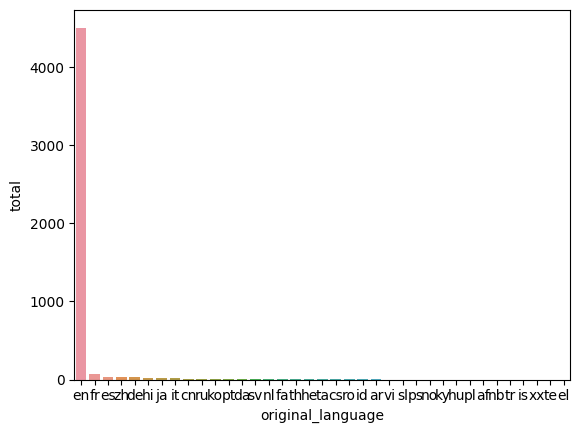

In [54]:
sns.barplot(x='original_language', y='total', data=contagem_de_linguas)

Para o conjunto de dados que estamos analisando, o gráfico de barras nos informa que existem mais filmes na língua inglesa do que nas demais línguas. No entanto, ele nos diz pouco acerca da quantidade de filmes produzidos em outros idiomas, porque as barras menores não são vistas claramente. Além disso, os rótulos do eixo horizontal estão sobrepostos.

Em vez de criarmos um dataframe com a contagem do número de aparições de cada idioma para depois plotarmos um gráfico de barras com `sns.barplot()`, podemos usar um gráfico de categorias — `sns.catplot()` — e especificar um tipo de agregação como contagem.

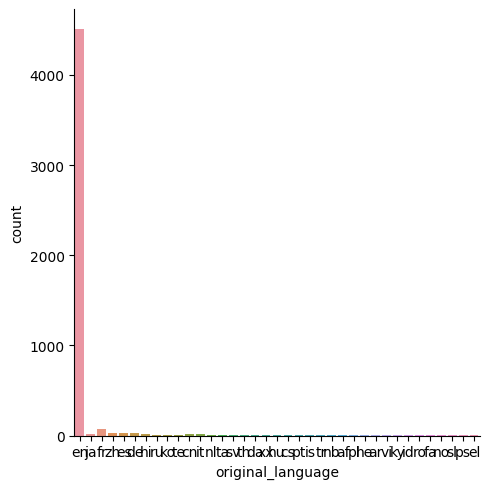

In [55]:
# Conta o número de aparições de cada idioma e plota um gráfico de barras
sns.catplot(x='original_language', kind='count', data=tmdb)

In [56]:
total_por_lingua = tmdb['original_language'].value_counts()
total_por_lingua

original_language
en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: count, dtype: int64

In [57]:
# Soma os valores da série
total_geral = total_por_lingua.sum()

# Obtém o total para inglês
total_ingles = total_por_lingua.loc['en']

# Obtém o total para as outras línguas
total_resto = total_geral - total_ingles

# Exibição
print(f'Total Geral: {total_geral}')
print(f'Total Inglês: {total_ingles}')
print(f'Total Resto: {total_resto}')

Total Geral: 4803
Total Inglês: 4505
Total Resto: 298


<Axes: xlabel='lingua', ylabel='totais'>

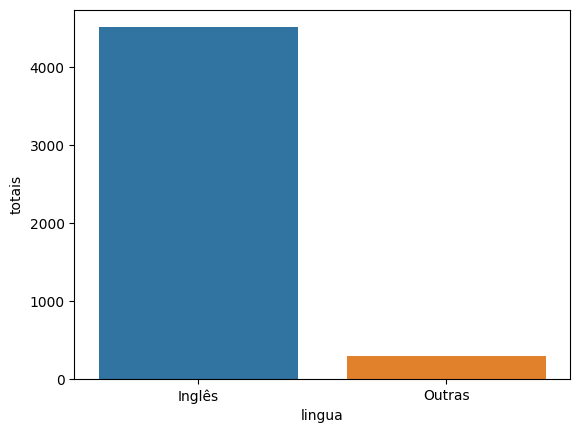

In [58]:
# Cria um dicionário para armazenar os dados que obtivemos
dados = {
    'lingua': ['Inglês', 'Outras'],
    'totais': [total_ingles, total_resto]
}

# Cria um dataframe a partir do dicionário acima
df = pd.DataFrame(dados)

# Plota um gráfico de barras a partir do dataframe
sns.barplot(x='lingua', y='totais', data=df)

Com esta visualização nossa mensagem fica muito mais clara: Existem muito mais filmes em inglês do que filmes em outras línguas, mesmo quando estes últimos são considerados juntos.

In [59]:
# Obtém todos os filmes cuja língua original NÃO é o inglês
tmdb.query("original_language != 'en'")

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
97,15000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,315011,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 7671,...",ja,シン・ゴジラ,From the mind behind Evangelion comes a hit la...,9.476999,"[{""name"": ""Cine Bazar"", ""id"": 5896}, {""name"": ...","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",2016-07-29,77000000,120.0,"[{""iso_639_1"": ""it"", ""name"": ""Italiano""}, {""is...",Released,A god incarnate. A city doomed.,Shin Godzilla,6.5,143
235,97250400,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 12, ""na...",http://www.asterixauxjeuxolympiques.com/index.php,2395,"[{""id"": 271, ""name"": ""competition""}, {""id"": 12...",fr,Astérix aux Jeux Olympiques,Astérix and Obélix have to win the Olympic Gam...,20.344364,"[{""name"": ""Constantin Film"", ""id"": 47}, {""name...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2008-01-13,132900000,116.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,NaN,Asterix at the Olympic Games,5.0,471
317,94000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",http://www.theflowersofwarmovie.com/,76758,"[{""id"": 173251, ""name"": ""forced prostitution""}...",zh,金陵十三釵,A Westerner finds refuge with a group of women...,12.516546,"[{""name"": ""Beijing New Picture Film Co. Ltd."",...","[{""iso_3166_1"": ""CN"", ""name"": ""China""}, {""iso_...",2011-12-15,95311434,145.0,"[{""iso_639_1"": ""zh"", ""name"": ""\u666e\u901a\u8b...",Released,NaN,The Flowers of War,7.1,187
474,0,"[{""id"": 9648, ""name"": ""Mystery""}, {""id"": 18, ""...",NaN,330770,"[{""id"": 428, ""name"": ""nurse""}, {""id"": 658, ""na...",fr,Évolution,11-year-old Nicolas lives with his mother in a...,3.300061,"[{""name"": ""Ex Nihilo"", ""id"": 3307}, {""name"": ""...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2015-09-14,0,81.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""}]",Released,NaN,Evolution,6.4,47
492,8000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 16, ""nam...",NaN,293644,"[{""id"": 209714, ""name"": ""3d""}]",es,Don Gato: El inicio de la pandilla,Top Cat has arrived to charm his way into your...,0.719996,"[{""name"": ""Anima Estudios"", ""id"": 9965}, {""nam...","[{""iso_3166_1"": ""IN"", ""name"": ""India""}, {""iso_...",2015-10-30,0,89.0,[],Released,NaN,Top Cat Begins,5.3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,90414,"[{""id"": 187056, ""name"": ""woman director""}]",fr,"I Love You, Don't Touch Me!","The story of a 25 year old virgin girl, lookin...",0.020839,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1997-01-21,0,86.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Just Your Typical Boy-Loves-Girl Who Doesn't L...,"I Love You, Don't Touch Me!",6.0,1
4751,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",NaN,42109,[],pt,"Gabriela, Cravo e Canela","In 1925, Gabriela becomes cook, mistress, and ...",0.557602,"[{""name"": ""United Artists"", ""id"": 60}, {""name""...","[{""iso_3166_1"": ""BR"", ""name"": ""Brazil""}]",1983-03-24,0,99.0,"[{""iso_639_1"": ""pt"", ""name"": ""Portugu\u00eas""}]",Released,NaN,Gabriela,6.0,2
4790,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10769, ""n...",NaN,13898,[],fa,دایره,Various women struggle to function in the oppr...,1.193779,"[{""name"": ""Jafar Panahi Film Productions"", ""id...","[{""iso_3166_1"": ""IR"", ""name"": ""Iran""}]",2000-09-08,0,90.0,"[{""iso_639_1"": ""fa"", ""name"": ""\u0641\u0627\u06...",Released,NaN,The Circle,6.6,17
4792,20000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 27, ""name...",NaN,36095,"[{""id"": 233, ""name"": ""japan""}, {""id"": 549, ""na...",ja,キュア,A wave of grueso

In [60]:
tmdb.query("original_language != 'en'")['original_language']

97      ja
235     fr
317     zh
474     fr
492     es
        ..
4739    fr
4751    pt
4790    fa
4792    ja
4798    es
Name: original_language, Length: 298, dtype: object

In [61]:
tmdb.query("original_language != 'en'")['original_language'].value_counts()

original_language
fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ro     2
id     2
ar     2
cs     2
ta     2
tr     1
nb     1
af     1
pl     1
is     1
hu     1
vi     1
ky     1
xx     1
te     1
no     1
sl     1
ps     1
el     1
Name: count, dtype: int64

In [62]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")

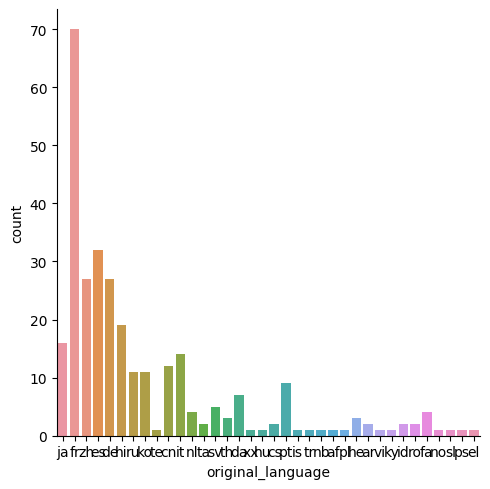

In [63]:
sns.catplot(x='original_language', kind='count', data=filmes_sem_lingua_original_em_ingles)

Com esta visualização, notamos que há mais filmes produzidos em francês do que nas demais línguas. No entanto, os rótulos do eixo horizontal estão sobrepostos e fica díficil identificarmos as diferenças entre as categorias. É, portanto, uma boa ideia ordenarmos as barras deste gráfico em ordem decrescente a fim de que possamos identificar mais facilmente a diferença entre as categorias.

In [64]:
contagem_outras_linguas = tmdb.query("original_language != 'en'")['original_language'].value_counts()
contagem_outras_linguas.columns = ['original_language', 'total']
contagem_outras_linguas

original_language
fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ro     2
id     2
ar     2
cs     2
ta     2
tr     1
nb     1
af     1
pl     1
is     1
hu     1
vi     1
ky     1
xx     1
te     1
no     1
sl     1
ps     1
el     1
Name: count, dtype: int64

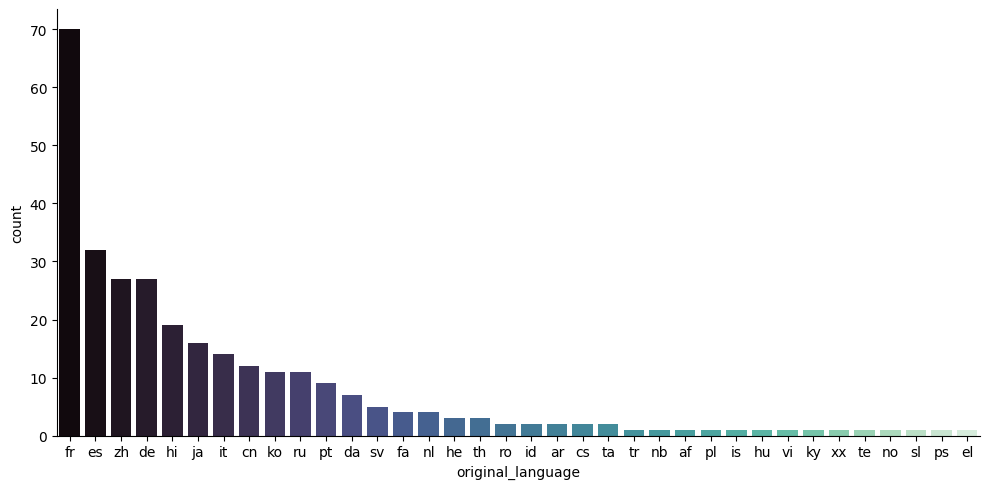

In [65]:
# aspect: Define um aspecto para a figura
# Não podemos usar o plt.figure(figsize=(14,8))
# sns.catplot é um método de alto nível
# order: Define uma ordem para ordenar as categorias
sns.catplot(x='original_language', kind='count', 
            data=filmes_sem_lingua_original_em_ingles,
            palette='mako',
            aspect=2, order=contagem_outras_linguas.index
           )

Com esta visualização, podemos notar facilmente que há mais filmes produzidos em francês do que nas demais línguas. Além disso, podemos identificar a diferença entre as quantidades de filmes produzidos em cada língua bem facilmente.

## Dados e Estatística

In [151]:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [152]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [153]:
notas_do_toy_story = notas.query('filmeId == 1')
notas_do_jumanji = notas.query('filmeId == 2')
print(len(notas_do_toy_story), len(notas_do_jumanji))

215 110


In [154]:
print('Nota média do Toy Story: %.2f' % notas_do_toy_story['nota'].mean())
print('Nota média do Jumanji: %.2f' % notas_do_jumanji['nota'].mean())

Nota média do Toy Story: 3.92
Nota média do Jumanji: 3.43


Com a média, não conseguimos saber quantas pessoas amaram e quantas odiaram cada filme, nem se a diferença entre o número das que amaram e das que odiaram é grande ou não.

In [155]:
print('Mediana das notas do Toy Story: %.2f' % notas_do_toy_story['nota'].median())
print('Mediana das notas do Jumanji: %.2f' % notas_do_jumanji['nota'].median())

Mediana das notas do Toy Story: 4.00
Mediana das notas do Jumanji: 3.50


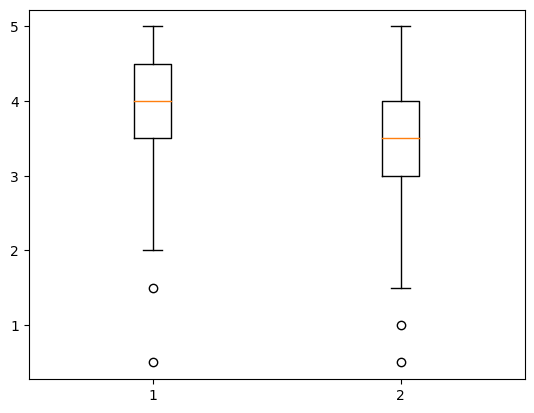

In [156]:
plt.boxplot([notas_do_toy_story['nota'], notas_do_jumanji['nota']])
plt.show()

<Axes: xlabel='filmeId', ylabel='nota'>

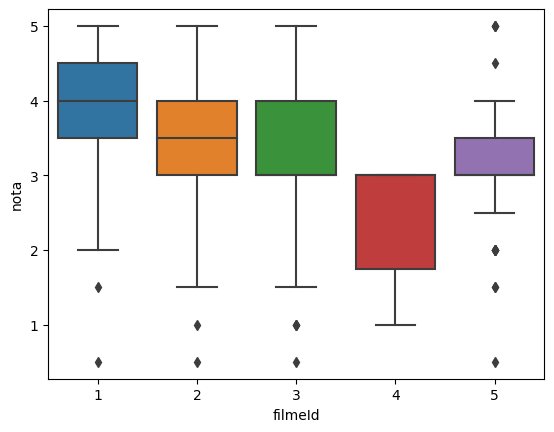

In [64]:
sns.boxplot(x='filmeId', y='nota', data=notas.query("filmeId in [1, 2, 3, 4, 5]"))

In [157]:
# Desvio padrão (medida que calcula o quanto os dados se desviam do padrão, isto é, de uma tendência central)
print(notas_do_toy_story['nota'].std(), notas_do_jumanji['nota'].std())

0.8348591407114047 0.8817134921476455
